# Classification of Hurricane Damage

Damage assessment after a natural disaster is a critical step in emergency response efforts. It allows responders to determine the scale of damage, allocate resources efficiently, and identify areas and communities in need of assistance. Damage assessments also help responders understand the degree of structural loss, the number of people displaced who need temporary housing, and the state of natural resources in the area. Overall, accurate and reliable damage assessments are key to informing response to natural disasters.

Traditionally, damage assessment is done by ground survey which relies on resources that are often limited after a disaster. A physical damage assessment requires a large amount of time, access to transportation systems, and additional resources and logistics to support a team of assessors traveling to the area. However, remote sensing has facilitated more resource efficient assessments following a disaster. Remote sensing tools can now be used to detect damage, predict future damage, and analyze total loss. These tools can use geospatial techniques to identify coordinate locations of real-time imagery to determine immediate needs in exact places. This data can also be used after a disaster event to classify the extent of damage and identify patterns to better prepare communities in the future.

## Loading Data

Within the directory there are four folders we're importing:

**train_another** : the training data; 5000 images of each class

**validation_another**: the testidation data; 1000 images of each class

**test_another** : the unbalanced test data; 8000/1000 images of damaged/undamaged classes

**test** : the balanced test data; 1000 images of each class

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras as keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils.np_utils import to_categorical
from matplotlib.pyplot import imread, imshow, subplots, show
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics

In [4]:
#Testing a single image's shape to determine number of channels to import
import skimage as skimage
import os as os

tr_path = '../Data/data_hurricane/train_another/damage/-93.6141_30.754263.jpeg'

image_test = skimage.io.imread(tr_path)

image_test.shape

#### Training Set Import

In [21]:
#Since the channels are 3, we can use keras to import into a dataset.
tr_path = '../Data/data_hurricane/train_another/'

#Use Keras to import data
tr_dataset = keras.utils.image_dataset_from_directory(
    tr_path,
    labels="inferred",
    label_mode="int",
    class_names= ['no_damage', 'damage'],
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

#Convert keras dataset to numpy array
tr_dataset = tr_dataset.unbatch()
tr_images = np.asarray(list(tr_dataset.map(lambda x, y: x)))
tr_labels = np.asarray(list(tr_dataset.map(lambda x, y: y)))


Found 10000 files belonging to 2 classes.


0: No Damage

1: Damage

0


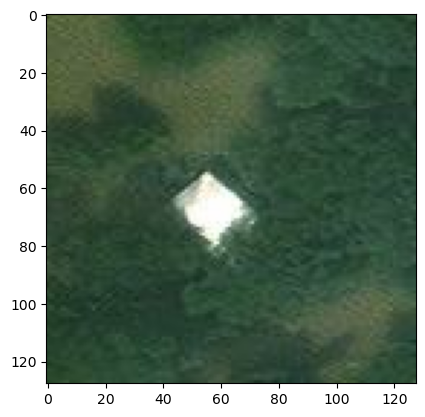

In [22]:
plt.imshow(tr_images[0].astype('uint8'))
print(tr_labels[5000])

The above image is in the damage folder as "-93.55964_30.895018", so the import is labeling them correctly.

#### Validation Set Import

In [19]:
#Since the channels are 3, we can use keras to import into a dataset.
val_path = '../Data/data_hurricane/validation_another/'

#Use Keras to import data
val_dataset = keras.utils.image_dataset_from_directory(
    val_path,
    labels="inferred",
    label_mode="int",
    class_names= ['no_damage', 'damage'],
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

#Convert keras dataset to numpy array
val_dataset = val_dataset.unbatch()
val_images = np.asarray(list(val_dataset.map(lambda x, y: x)))
val_labels = np.asarray(list(val_dataset.map(lambda x, y: y)))

Found 2000 files belonging to 2 classes.


#### Testing Set Import

There are two test sets for this data, one with imbalanced data (another_test) and one with balanced (test). 

These will be kept for final testing.

In [24]:
#Since the channels are 3, we can use keras to import into a dataset.
test_path = '../Data/data_hurricane/test/'

#Use Keras to import data
test_dataset = keras.utils.image_dataset_from_directory(
    test_path,
    labels="inferred",
    label_mode="int",
    class_names= ['no_damage', 'damage'],
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

#Convert keras dataset to numpy array
test_dataset = test_dataset.unbatch()
test_images = np.asarray(list(test_dataset.map(lambda x, y: x)))
test_labels = np.asarray(list(test_dataset.map(lambda x, y: y)))

Found 2000 files belonging to 2 classes.


In [25]:
#Since the channels are 3, we can use keras to import into a dataset.
testPlus_path = '../Data/data_hurricane/test_another/'

#Use Keras to import data
testPlus_dataset = keras.utils.image_dataset_from_directory(
    testPlus_path,
    labels="inferred",
    label_mode="int",
    class_names= ['no_damage', 'damage'],
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

#Convert keras dataset to numpy array
testPlus_plus_dataset = testPlus_dataset.unbatch()
testPlus_images = np.asarray(list(testPlus_dataset.map(lambda x, y: x)))
testPlus_labels = np.asarray(list(testPlus_dataset.map(lambda x, y: y)))

Found 9000 files belonging to 2 classes.


C:\Users\Beeel\AppData\Local\Temp\ipykernel_36968\1909265154.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  testPlus_images = np.asarray(list(testPlus_dataset.map(lambda x, y: x)))
C:\Users\Beeel\AppData\Local\Temp\ipykernel_36968\1909265154.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  testPlus_labels = np.asarray(list(testPlus_dataset.map(lambda x, y: y)))


### Preprocessing Images

We could add more data if we wanted to process via zoom, rotate, etc and add more images?

## Model 1: CNN

We will develop our own CNN model using convolutional layers and fully connected layers, while incorporating other layers such as batch normalization, dropout, flattening, and others to help normalize the data

In [23]:
#Split train data into train and test

x_tr_train, x_tr_test, y_tr_train, y_tr_test = train_test_split(tr_images, tr_labels, test_size=0.5, random_state=0)

In [34]:
y_tr_test.shape

(5000, 2)

In [33]:
#convert labels to binary class matrices
y_tr_train = to_categorical(y_tr_train)
y_tr_test = to_categorical(y_tr_test)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 2)       56        
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 2)        0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 64, 64, 2)         0         
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 2)                 16386     
                                                                 
Total params: 16,442
Trainable params: 16,442
Non-trainable params: 0
__________________________________________________

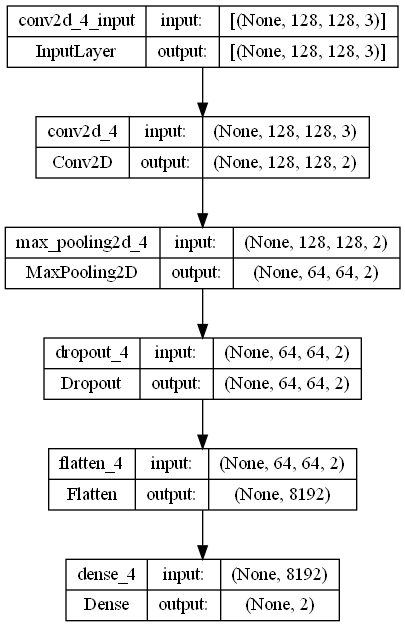

In [30]:
#Compile model with Conv2D, MaxPooling2D, Dropout, Flatten, and Dense layers

from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras.utils import plot_model

CNN_1 = Sequential()
CNN_1.add(Conv2D(input_shape=(128,128,3), filters=2, kernel_size=(3, 3), padding = 'same', activation='relu'))
CNN_1.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
CNN_1.add(Dropout(0.25))
CNN_1.add(Flatten())
CNN_1.add(Dense(2, activation='softmax'))

#summarize model
CNN_1.summary()

#plot model
plot_model(CNN_1, to_file='model-plot_CNN_1.png', show_shapes=True, show_layer_names=True)

In [37]:
#compile model
CNN_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#fit model
history1 = CNN_1.fit(x_tr_train, y_tr_train, epochs=50, batch_size=16, validation_data=(x_tr_test, y_tr_test))

Epoch 1/50
313/313 [==============================] - 5s 14ms/step - loss: 0.4376 - accuracy: 0.8186 - val_loss: 1.1789 - val_accuracy: 0.7288
Epoch 2/50
313/313 [==============================] - 4s 11ms/step - loss: 0.4304 - accuracy: 0.8184 - val_loss: 1.2244 - val_accuracy: 0.6814
Epoch 3/50
313/313 [==============================] - 3s 11ms/step - loss: 0.3919 - accuracy: 0.8432 - val_loss: 1.2787 - val_accuracy: 0.7492
Epoch 4/50
313/313 [==============================] - 4s 11ms/step - loss: 0.3911 - accuracy: 0.8512 - val_loss: 1.8879 - val_accuracy: 0.7700
Epoch 5/50
313/313 [==============================] - 4s 11ms/step - loss: 0.4174 - accuracy: 0.8340 - val_loss: 1.2030 - val_accuracy: 0.7648
Epoch 6/50
313/313 [==============================] - 4s 12ms/step - loss: 0.3518 - accuracy: 0.8620 - val_loss: 1.5229 - val_accuracy: 0.7694
Epoch 7/50
313/313 [==============================] - 4s 11ms/step - loss: 0.3527 - accuracy: 0.8734 - val_loss: 1.7385 - val_accuracy: 0.7372

Test loss: 3.5712902545928955
Test accuracy: 0.7865999937057495


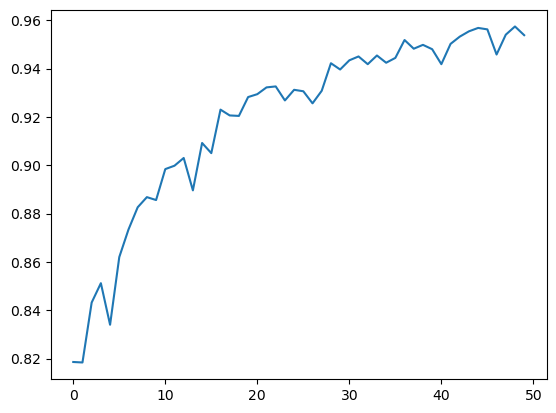

In [38]:
#plot accuracy
plt.plot(history1.history['accuracy'])

#accuracy of model
score1 = CNN_1.evaluate(x_tr_test, y_tr_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

## Model 2: Transfer Learning

We're first trying VGG16

## Model 3: UNET Damage Assessment Classification

Using both damage and undamaged data, we're training an image segmentation model to identify damage in the photos and seeing if certain details can visually indicate that the structure is damaged.